# Maier dataset

In [6]:
from model.graph_mcmc import Graph_MCMC

In [7]:
graph = Graph_MCMC()
graph.read_from_ns("football_tsevans")
graph.remove_property("_graphml_vertex_id")
graph.remove_property("_pos")
graph.remove_property("label")
graph.convert_to_flags("value", "conf-")

Vertex props: ['conf-0', 'conf-1', 'conf-2', 'conf-3', 'conf-4', 'conf-5', 'conf-6', 'conf-7', 'conf-8', 'conf-9', 'conf-10', 'conf-11', 'conf-12', 'conf-13', 'conf-14', 'conf-15', 'conf-16', 'conf-17', 'conf-18']


In [8]:
graph.print_info()

Graph with N=115 nodes, E=613 edges and D=19 vertex features


In [10]:
graph.partition(B_min=5, B_max=20)

Performing inference...
    B: 12 <- 20    shrinking 20 -> 15
    B: 12 <- 20    B=15  niter:     1  count:    0  breaks:  0  min_S: 1561.7058  max_S: 1571.3028  S: 1561.7058  ΔS:     -9.59702  moves:     7 
    B: 12 <- 20    B=15  niter:     2  count:    0  breaks:  0  min_S: 1557.5035  max_S: 1571.3028  S: 1557.5035  ΔS:     -4.20232  moves:     5 
    B: 12 <- 20    B=15  niter:     3  count:    1  breaks:  1  min_S: 1557.5035  max_S: 1571.3028  S: 1557.5035  ΔS:      0.00000  moves:     0 
    B: 12 <- 20    shrinking 15 -> 12
    B: 12 <- 20    B=12  niter:     1  count:    1  breaks:  1  min_S: 1560.8783  max_S: 1560.8783  S: 1560.8783  ΔS:      0.00000  moves:     0 
Current bracket: (5, 12, 20) (1661.308387546692, 1560.878311067537, 1566.2894246904812)
Current bracket: (5, 12, 20) (1661.308387546692, 1560.878311067537, 1566.2894246904812)
Bisect at B = 15 with S = 1557.503507623503
    B: 17 <- 20    shrinking 20 -> 17
    B: 17 <- 20    B=17  niter:     1  count:    0  breaks

<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f3b94c40400, at 0x7f3b94b995b0>

In [11]:
graph.mcmc(num_iter=1000)

100%|██████████| 1000/1000 [00:00<00:00, 2652.94it/s]


16

Drawing soft partition


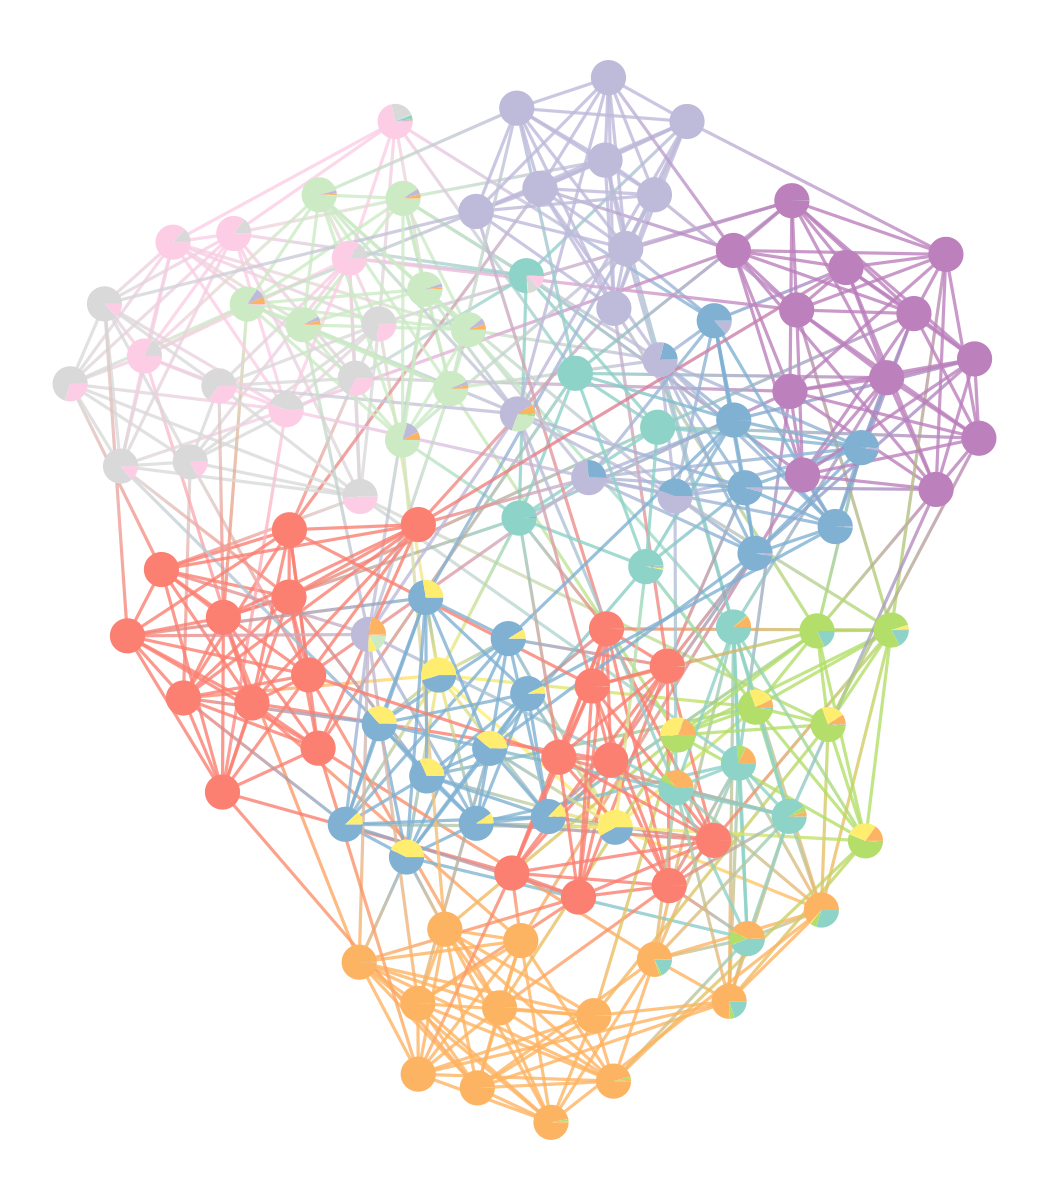

In [13]:
graph.draw()

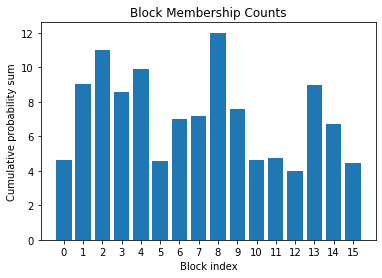

In [24]:
graph.plot_posterior_props()

## Train classifier

In [14]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.1, verbose=True)

100%|██████████| 10000/10000 [00:10<00:00, 998.67it/s]Sample accept ratio: 81.58999999999999%
Train. set accuracy: 72.17391304347827%



## Interpret results

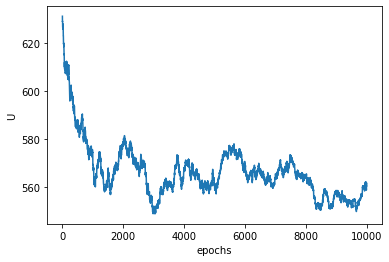

In [15]:
classifier.plot_U()

In [16]:
classifier.thin_samples()

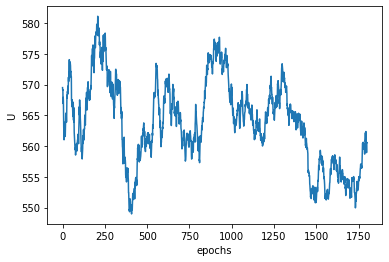

In [17]:
classifier.plot_U()

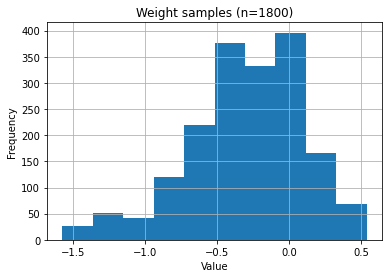

In [18]:
classifier.plot_sample_histogram()

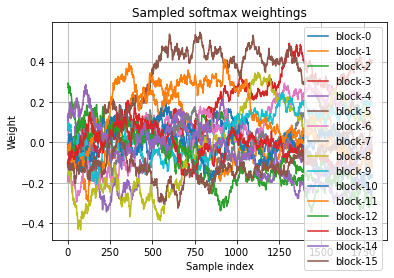

In [19]:
classifier.plot_sample_history()

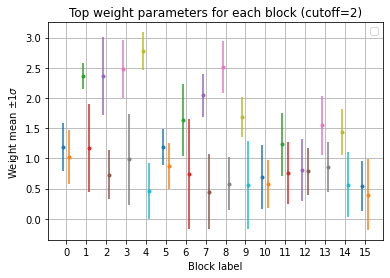

In [22]:
names = graph.get_feature_names()
classifier.plot_block_principal_dims(names, cutoff=2, legend=False)

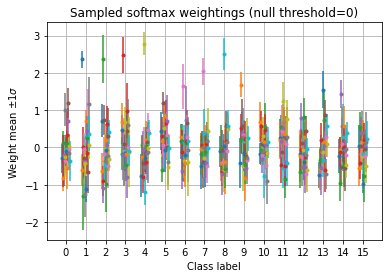

In [23]:
names = graph.get_feature_names()
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=0)